# Problem Statement

Netflix, being a leading global media and video streaming platform with over 222 million subscribers worldwide, aims to leverage data-driven insights to make informed decisions on content production and business growth. The primary goal is to analyze the dataset containing information about movies and TV shows available on Netflix. The objective is to generate actionable insights that will guide Netflix in determining the types of shows and movies to produce and how to strategically expand its business in different countries.

# Analysing Basic Metrics

In [292]:
# importing python libraries for data analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
netflix_df = pd.read_csv("netflix.csv") #Reading a csv file into pandas dataframe

In [294]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  Observations and Conversion

In [295]:
netflix_df.shape

(8807, 12)

In [296]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [297]:
#There are total 8807 rows and 12 columns in the dataset 
#We can clearly see that there is only one numberical column "release_year", 
#but its not useful for analysing statistical summary.
#Total 12 columns in the dataset, 11 of them of object datatype and 1 of integer datatype.

In [298]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format="%B %d, %Y") #conversion from object to datetime datatype

In [299]:
netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)') #exctracting numerical values of duration.
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')

In [300]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [301]:
df = netflix_df #Nested dataframe 

In [302]:
#Converted date_added column to datetime datatype to get valuable insights.
#No need to convert realease_year to datetime as its already an integer and typically contains years.

In [303]:
#Unnesting columns

In [304]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [305]:
df1 = netflix_df[['title', 'cast']]

df1 = df1.assign(cast=netflix_df['cast'].str.split(',')).explode('cast')


df2 = netflix_df[['title', 'country']]

df2 = df2.assign(country=netflix_df['country'].str.split(',')).explode('country')


df3 = netflix_df[['title', 'listed_in']]

df3 = df3.assign(listed_in=netflix_df['listed_in'].str.split(',')).explode('listed_in')


df12 = df1.merge(df2, on='title')


df123 = df12.merge(df3, on='title')


netflix_df = netflix_df.drop(['cast', 'country', 'listed_in'], axis=1)


df_final = netflix_df.merge(df123, on='title')

df_final.shape

(186399, 12)

In [306]:
data = df_final #Unnested dataframe

In [307]:
data.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186399 entries, 0 to 186398
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186399 non-null  object        
 1   type          186399 non-null  object        
 2   title         186399 non-null  object        
 3   director      135756 non-null  object        
 4   date_added    186241 non-null  datetime64[ns]
 5   release_year  186399 non-null  int64         
 6   rating        186332 non-null  object        
 7   duration      186396 non-null  float64       
 8   description   186399 non-null  object        
 9   cast          184551 non-null  object        
 10  country       175254 non-null  object        
 11  listed_in     186399 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 17.1+ MB


In [309]:
# Missing value detection
data.isnull().sum()

show_id             0
type                0
title               0
director        50643
date_added        158
release_year        0
rating             67
duration            3
description         0
cast             1848
country         11145
listed_in           0
dtype: int64

In [310]:
#Solving Missing value columns
data['director'] = data['director'].fillna('Unknown director')

data['cast'] = data['cast'].fillna('Unknown actor')

data['country'] = data['country'].fillna('Unknown country')

data = data.dropna(subset = ['date_added', 'duration', 'rating'])

data.isnull().sum().sum()

0

In [311]:
#Statistical Summary
data.describe()

,date_added,release_year,duration
count,186171,186171.000000,186171.000000
mean,2019-06-28 14:37:37.447185664,2013.424889,76.760736
min,2008-01-01 00:00:00,1925.000000,1.000000
25%,2018-07-03 00:00:00,2012.000000,3.000000
50%,2019-09-24 00:00:00,2016.000000,95.000000
75%,2020-09-16 00:00:00,2019.000000,112.000000
max,2021-09-25 00:00:00,2021.000000,312.000000
std,NaN,9.053024,52.267785


In [312]:
#conversion of categorical attributes to 'category' (If required)
columns_category = ['type', 'rating', 'country']

for column in columns_category:
    data.loc[:, column]  = data[column].astype('category')

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186171 entries, 0 to 186398
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186171 non-null  object        
 1   type          186171 non-null  object        
 2   title         186171 non-null  object        
 3   director      186171 non-null  object        
 4   date_added    186171 non-null  datetime64[ns]
 5   release_year  186171 non-null  int64         
 6   rating        186171 non-null  object        
 7   duration      186171 non-null  float64       
 8   description   186171 non-null  object        
 9   cast          186171 non-null  object        
 10  country       186171 non-null  object        
 11  listed_in     186171 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.5+ MB


## Total number of Movies Vs TV shows

In [314]:
type_count = data.groupby('type')['title'].nunique().reset_index(name='count')
type_count

,type,count
0,Movie,6126
1,TV Show,2664


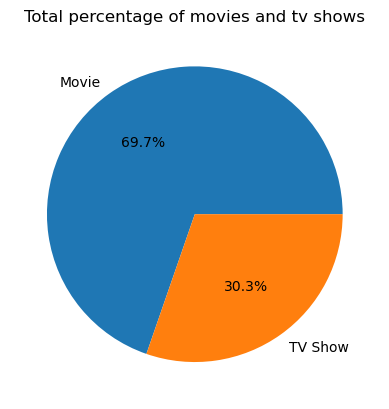

In [315]:
plt.pie(data=type_count, x='count', labels= type_count.type, autopct='%1.1f%%')
plt.title("Total percentage of movies and tv shows")
plt.show()

There are total of 6126 movies and 2664 tv shows in the data set

## Movies and TV Shows with different ratings

In [316]:

data.loc[:,'rating'] = data['rating'].str.strip()

In [317]:
movies_df = data[data['type'] == 'Movie']
#movies_df['duration'] = movies_df['duration'].str.extract('(\d+)')

#movies_df['duration'] = pd.to_numeric(movies_df['duration'])

In [318]:
ratings_count = movies_df.groupby('rating')['title'].nunique().reset_index(name='movie count')
ratings_count.sort_values('movie count',ascending=False)

,rating,movie count
8,TV-MA,2062
6,TV-14,1427
5,R,797
9,TV-PG,540
4,PG-13,490
3,PG,287
11,TV-Y7,139
10,TV-Y,131
7,TV-G,126
2,NR,75


Most number of movies are with ratings "TV-MA".
Least number of movies are with ratings "UR" and "NC-17".

In [319]:
tv_shows_df = data[data['type'] == 'TV Show']
#tv_shows_df['duration'] = tv_shows_df['duration'].str.extract('(\d+)')

#tv_shows_df['duration'] = pd.to_numeric(tv_shows_df['duration'])


In [320]:
ratings_count = tv_shows_df.groupby('rating')['title'].nunique().reset_index(name='TV Show count')
ratings_count.sort_values('TV Show count',ascending=False)

,rating,TV Show count
4,TV-MA,1143
2,TV-14,730
5,TV-PG,321
7,TV-Y7,194
6,TV-Y,175
3,TV-G,94
0,NR,4
1,R,2
8,TV-Y7-FV,1


Most number of tv shows are with ratings "TV-MA".
Least number of movies are with "TV-Y7-FV".

## Countries with most movies and tv shows

In [321]:
country_count = movies_df.groupby('country')['title'].nunique().reset_index(name="count")
top_10_country_movies = country_count.sort_values('count', ascending=False).head(10)
top_10_country_movies

,country,count
181,United States,2361
136,India,927
182,Unknown country,439
103,United States,388
180,United Kingdom,382
118,Canada,187
32,France,155
102,United Kingdom,152
127,France,148
18,Canada,132


Top 10 countries with most number of movies

In [322]:
country_count = tv_shows_df.groupby('country')['title'].nunique().reset_index(name="TV Show Count")
top_10_country_tv = country_count.sort_values('TV Show Count', ascending=False).head(10)
top_10_country_tv

,country,TV Show Count
100,United States,841
101,Unknown country,390
99,United Kingdom,245
69,Japan,172
90,South Korea,164
42,United States,91
50,Canada,84
64,India,81
94,Taiwan,70
60,France,64


Top 10 countries with most number of tv shows

## Production of Movies and TV shows over the years

In [323]:
movies_per_year_counts = movies_df.groupby('release_year')['title'].nunique().reset_index(name='movies count')
movies_per_year_counts.sort_values('movies count', ascending=False).head(10)

,release_year,movies count
69,2018,767
68,2017,765
67,2016,658
70,2019,633
71,2020,517
66,2015,396
72,2021,277
65,2014,264
64,2013,225
63,2012,173


C:\Users\ShubhamYeole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

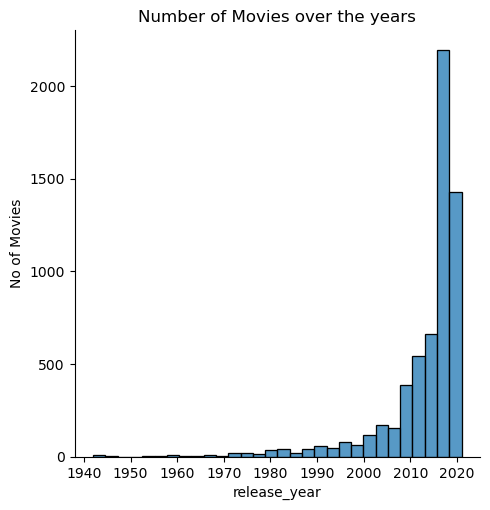

In [324]:
plt.figure(figsize=(12,6))
sns.displot(data = netflix_df[netflix_df['type']=='Movie'], x= 'release_year', kde=False, bins=30)
plt.ylabel('No of Movies')
plt.title("Number of Movies over the years")
plt.show()

In [325]:
tv_per_year_counts = tv_shows_df.groupby('release_year')['title'].nunique().reset_index(name='TV Shows count')
tv_per_year_counts.sort_values('TV Shows count', ascending=False).head(10)

,release_year,TV Shows count
44,2020,436
43,2019,397
42,2018,379
45,2021,315
41,2017,265
40,2016,243
39,2015,159
38,2014,88
36,2012,63
37,2013,61


C:\Users\ShubhamYeole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

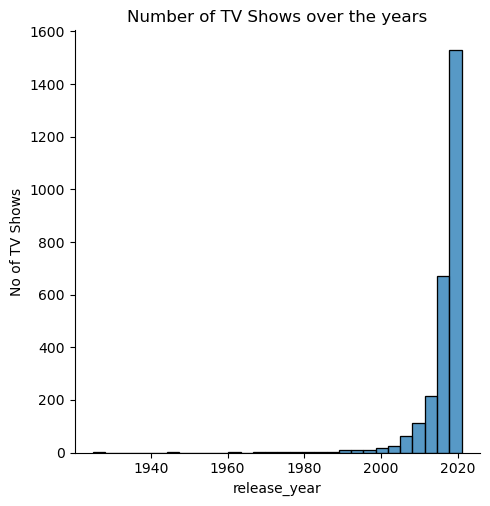

In [326]:
plt.figure(figsize=(12,6))
sns.displot(data = netflix_df[netflix_df['type']=='TV Show'], x= 'release_year', kde=False, bins=30)
plt.ylabel('No of TV Shows')
plt.title("Number of TV Shows over the years")
plt.show()

The popularity of TV Show productions increased after the year 2005. Even during the pandemic, the growth of tv shows production increased. 

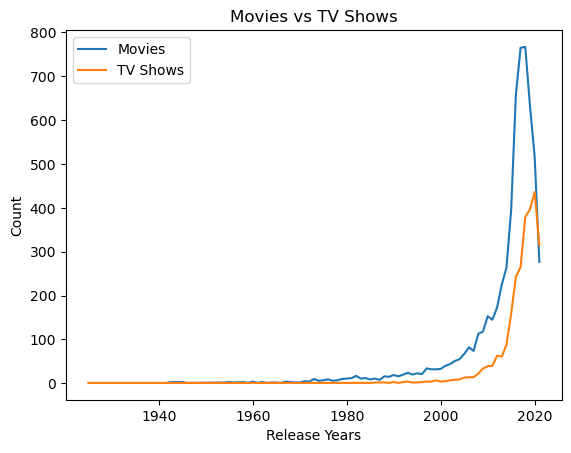

In [327]:
sns.lineplot(data=movies_per_year_counts, x='release_year', y='movies count', label='Movies')
sns.lineplot(data=tv_per_year_counts, x='release_year', y='TV Shows count', label='TV Shows')
plt.title("Movies vs TV Shows")
plt.xlabel('Release Years')
plt.ylabel('Count')
plt.legend()
plt.show()

## Average Duration of Movies and TV Shows

Text(0.5, 1.0, 'Average Duration of Movies')

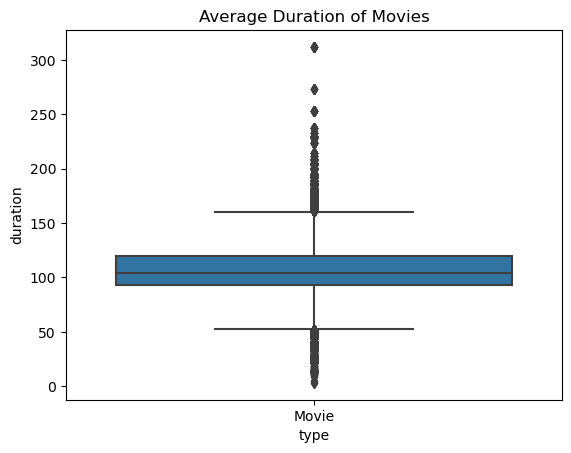

In [328]:
sns.boxplot(x='type', y='duration', data=movies_df)
plt.title("Average Duration of Movies")

In [329]:
movies_df['duration'].mean()

107.5286956389906

The average duration or runtime of movies is 107.5 minutes

Text(0.5, 1.0, 'Average duration of TV Shows')

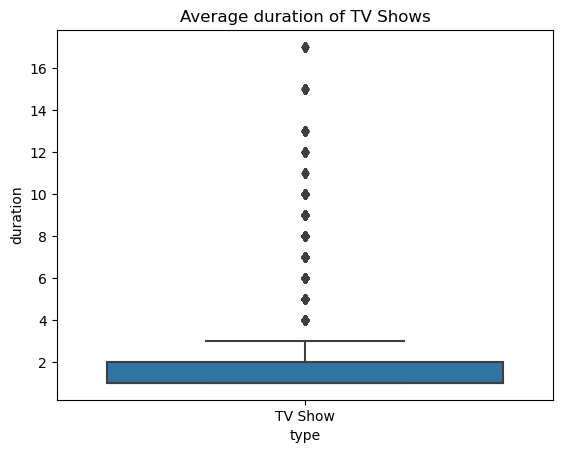

In [330]:
sns.boxplot(x='type', y='duration', data=tv_shows_df)
plt.title("Average duration of TV Shows")

In [331]:
tv_shows_df['duration'].mean()

1.9454582319545823

For TV Shows the durationis measured in seasons, for which the average is 1.9 seasons

## Top 20 Genres across Netflix


In [332]:
filtered_genres = data.groupby('listed_in')['title'].nunique().reset_index(name='count')
filtered_genres

,listed_in,count
0,Anime Features,50
1,Children & Family Movies,36
2,Classic & Cult TV,6
3,Classic Movies,36
4,Comedies,464
...,...,...
68,TV Dramas,67
69,TV Horror,11
70,TV Sci-Fi & Fantasy,1
71,TV Shows,16


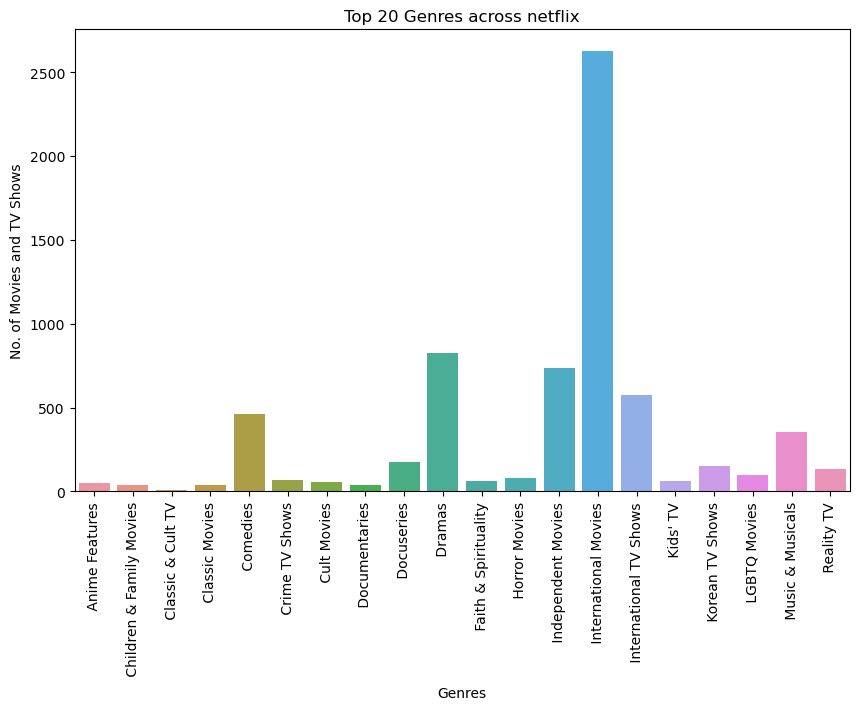

In [333]:
plt.figure(figsize=(10,6))
sns.barplot(data= filtered_genres[:20], y= 'count', x= 'listed_in')
plt.xlabel("Genres")
plt.ylabel("No. of Movies and TV Shows")
plt.xticks(rotation=90)
plt.title("Top 20 Genres across netflix")
plt.show()

"International Movies" is the most popular genre while "Classic & Cult TV" is the least popular.

## Best time to launch Movies and TV shows on netflix.

In [334]:
movies_df['week_added'] = movies_df['date_added'].dt.isocalendar().week

C:\Users\Shubham Yeole\AppData\Local\Temp\ipykernel_19308\920358558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['week_added'] = movies_df['date_added'].dt.isocalendar().week


In [335]:
movies_week = movies_df.groupby('week_added')['title'].nunique().reset_index(name='No of Movies')
movies_week.sort_values('No of Movies', ascending=False).head()

,week_added,No of Movies
0,1,316
43,44,243
39,40,215
8,9,206
25,26,195


Top 5 weeks of the year when most number of movies are added on netflix. Based on data, we can conclude that these weeks of year is the best time to add movies.

In [336]:
tv_shows_df['month_added'] = tv_shows_df['date_added'].dt.month

C:\Users\Shubham Yeole\AppData\Local\Temp\ipykernel_19308\2055704330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['month_added'] = tv_shows_df['date_added'].dt.month


In [337]:
tv_shows_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast,country,listed_in,month_added
1,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,9
2,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,9
3,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,9
4,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,9
5,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,TV Dramas,9


In [338]:
shows_month = tv_shows_df.groupby('month_added')['title'].nunique().reset_index(name='No of TV Shows')
shows_month.sort_values('No of TV Shows', ascending=False)

,month_added,No of TV Shows
11,12,265
6,7,262
8,9,251
5,6,236
7,8,236
9,10,215
3,4,214
2,3,213
10,11,207
4,5,193


Best month to launch tv shows on netflix is December followed by july and september

## Actors and Directors with most number of movie & shows

In [339]:
actors = data.groupby('cast')['title'].nunique().reset_index(name = 'count')
actors = actors.sort_values('count', ascending = False)
actors = actors.drop(38935) #dropping the row with unknown actor
actors.head()

,cast,count
2605,Anupam Kher,39
26903,Rupa Bhimani,31
30263,Takahiro Sakurai,30
15518,Julie Tejwani,28
23591,Om Puri,27


Top 5 actors with most number of movies and tv shows.

In [340]:
directors = data.groupby('director')['title'].nunique().reset_index(name = 'count')
directors = directors.sort_values('count', ascending = False)
directors = directors.drop(4301) #dropping the row with unknown director
directors.head()

,director,count
3390,Rajiv Chilaka,19
3441,"Raúl Campos, Jan Suter",18
2596,Marcus Raboy,16
4044,Suhas Kadav,16
1789,Jay Karas,14


Top 5 directors with most number of movies and tv shows.

In [341]:
data['year_added'] = data['date_added'].dt.year

C:\Users\Shubham Yeole\AppData\Local\Temp\ipykernel_19308\207067128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_added'] = data['date_added'].dt.year


In [342]:
corr_matrix = data[['release_year', 'duration', 'year_added']].corr()
corr_matrix

,release_year,duration,year_added
release_year,1.000000,-0.309229,0.045932
duration,-0.309229,1.000000,0.034160
year_added,0.045932,0.034160,1.000000


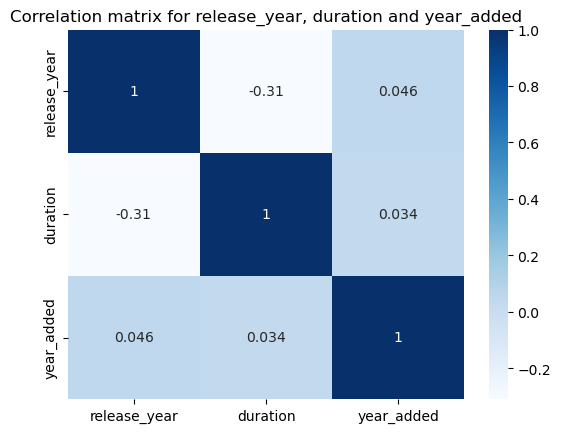

In [343]:
sns.heatmap(data=corr_matrix, cmap='Blues', annot=True)
plt.title("Correlation matrix for release_year, duration and year_added")
plt.show()

We can infer that there's moderate negative correlation between duration and release_year,
also there's weak positive correlation between release_year and year_added.

## Content addition Time after release date

In [344]:
data['days_to_addition'] = (data['date_added'] - pd.to_datetime(data['release_year'], format="%Y")).dt.days

C:\Users\Shubham Yeole\AppData\Local\Temp\ipykernel_19308\2959066914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_to_addition'] = (data['date_added'] - pd.to_datetime(data['release_year'], format="%Y")).dt.days


In [345]:
data.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,cast,country,listed_in,year_added,days_to_addition
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",Unknown actor,United States,Documentaries,2021,633
1,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,2021,266
2,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,2021,266
3,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,2021,266
4,s2,TV Show,Blood & Water,Unknown director,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,2021,266


In [346]:
data['days_to_addition'].mode().values[0]

243

The most frequent time to add content to netflix after release is 243 days

# Buisness Insights



1. **Content Landscape:**
   - The dataset contains 6,126 movies and 2,664 TV shows. The majority of movies have a rating of "TV-MA," while "UR" and "NC-17" have the fewest. For TV shows, "TV-MA" is the most common rating, and "TV-Y7-FV" is the least common.
   

2. **Top Countries for Content:**
   - The United States, India, and the United Kingdom are the top countries for both movies and TV shows. 
   

3. **Production Trends:**
   - The popularity of TV show productions increased after 2005, even during the pandemic. This suggests a growing trend in TV show consumption.
   

4. **Average Durations:**
   - The average duration for movies is 107.5 minutes, while for TV shows, it is 1.9 seasons. This insight can guide content creators in planning and producing content of appropriate lengths.
   

5. **Genre Popularity:**
   - "International Movies" is the most popular genre, indicating a diverse content library. However, "Classic & Cult TV" is the least popular, suggesting a potential gap in content offerings.
   

6. **Optimal Timing for Additions:**
   - The dataset suggests that 1, 44, 40 weeks of the year are optimal for adding movies to Netflix. Understanding these peak periods can help in planning content releases for maximum impact.
   

7. **Best Month for TV Show Launch:**
   - December is the best month to launch TV shows, followed by July and September. This information can guide content release schedules to maximize viewer engagement.
   

8. **Top Actors and Directors:**
   - Anupam Kher, Rupa Bhimani, and Takahiro Sakurai are among the top actors, while Rajiv Chilaka and Raúl Campos are prominent directors. Collaborating with these talents may attract viewers based on their popularity.
   

9. **Correlation Insights:**
   - There's a moderate negative correlation between the duration of content and its release year. This suggests a potential shift towards shorter content over the years.
   - There's a weak positive correlation between the release year and the year it is added to Netflix, indicating a slight trend of adding older content.
   

10. **Optimal Time to Add Content:**
    - The most frequent time to add content to Netflix after its release is 243 days. This information can be useful for planning content additions and marketing strategies.

# Recommendations:

1. **Diversify Content Origin:**
   - Considering the popularity of content from the United States, India, and the United Kingdom, diversifying content origin can attract a global audience.

2. **Emphasize TV Show Productions:**
   - Given the increasing popularity of TV show productions, allocate resources and efforts towards creating engaging TV show content.

3. **Explore Different Genres:**
   - While "International Movies" are popular, exploring other genres, especially "Classic & Cult TV," can fill potential content gaps.

4. **Strategic Release Planning:**
   - Plan movie releases during peak weeks identified in the dataset for maximum visibility and audience engagement.

5. **Strategic TV Show Launches:**
   - Leverage the popularity of December, July, and September for launching TV shows to capture the audience's attention.

6. **Collaborate with Top Actors and Directors:**
   - Collaborating with top actors like Anupam Kher and directors like Rajiv Chilaka can enhance the attractiveness of the content.

7. **Optimize Content Duration:**
   - Considering the negative correlation between duration and release year, optimize content duration to align with viewer preferences.

8. **Explore Older Content:**
   - Given the weak positive correlation between release year and the year added to Netflix, exploring and adding older content can contribute to the library's richness.

9. **Regularly Update Content:**
   - Consistently adding content approximately 243 days after release can maintain a fresh and updated library for subscribers.

10. **Viewer Engagement Strategies:**
    - Implement strategies to engage viewers during peak periods, such as targeted marketing campaigns and promotions.

    - These recommendations aim to capitalize on observed patterns, enhance content diversity, and optimize content strategies for a more engaging viewer experience.